In [1]:
import numpy as np
from PIL import Image
from tqdm import tqdm
import numba
import matplotlib.pyplot as plt

%config IPCompleter.greedy=True

## Getting normal vectors from depth image

In [2]:
def convert_depth_to_normals(depth_img: np.ndarray):
    n, m = depth_img.shape
    normals_img = np.zeros((n, m, 3))
    
    for x in tqdm(range(1, n - 1), desc='Iterating through rows'):
        for y in range(1, m - 1):
            dzdx = (depth_img[x + 1, y] - depth_img[x - 1, y]) / 2.0;
            dzdy = (depth_img[x, y + 1] - depth_img[x, y - 1]) / 2.0;
            
            direction = np.array([-dzdx, -dzdy, 1.0], dtype=np.float32)
            magnitude = np.sqrt((direction ** 2).sum())
            normals_img[x, y] = direction / magnitude
    return normals_img

@numba.jit(nopython=True)
def convert_depth_to_normals_faster(depth_img: np.ndarray):
    n, m = depth_img.shape
    normals_img = np.zeros((n, m, 3))
    
    for x in range(1, n - 1):
        for y in range(1, m - 1):
            dzdx = (depth_img[x + 1, y] - depth_img[x - 1, y]) / 2.0;
            dzdy = (depth_img[x, y + 1] - depth_img[x, y - 1]) / 2.0;
            
            direction = np.array([-dzdx, -dzdy, 1.0], dtype=np.float32)
            magnitude = np.sqrt((direction ** 2).sum())
            normals_img[x, y] = direction / magnitude
    return normals_img

In [3]:
def normalize(img):
    return (img - img.min()) / (img.max() - img.min())

In [4]:
depth_img = np.array(Image.open('../images/synthetic_depth.png'), dtype=np.float32)

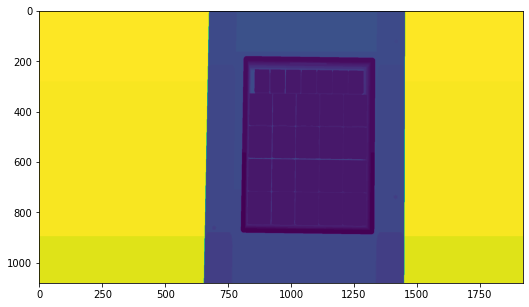

In [5]:
plt.figure(figsize=(15, 5))
plt.imshow(depth_img)

In [6]:
%%time
normals_img = convert_depth_to_normals(depth_img)

Iterating through rows: 100%|██████████| 1078/1078 [00:25<00:00, 41.90it/s]

CPU times: user 25.8 s, sys: 532 ms, total: 26.4 s
Wall time: 25.7 s


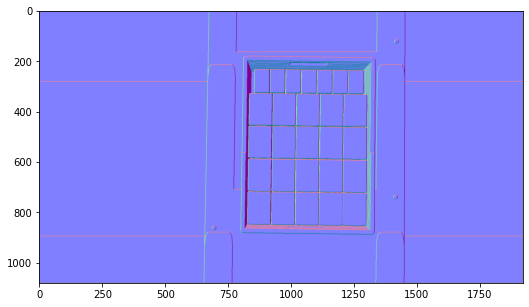

In [7]:
plt.figure(figsize=(15, 5))
plt.imshow(normalize(normals_img))

## Speedup with numba

In [8]:
%%time
normals_img = convert_depth_to_normals_faster(depth_img)

CPU times: user 1.26 s, sys: 862 ms, total: 2.13 s
Wall time: 1.07 s


## Test on puma image
https://stackoverflow.com/questions/34644101/calculate-surface-normals-from-depth-image-using-neighboring-pixels-cross-produc/34644939#34644939

In [9]:
puma = np.array(Image.open('../images/puma.png'), dtype=np.float32)

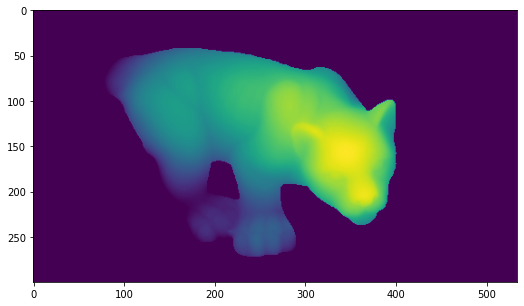

In [10]:
plt.figure(figsize=(15, 5))
plt.imshow(puma)

In [11]:
puma_normals = convert_depth_to_normals(puma)

Iterating through rows: 100%|██████████| 298/298 [00:02<00:00, 118.00it/s]


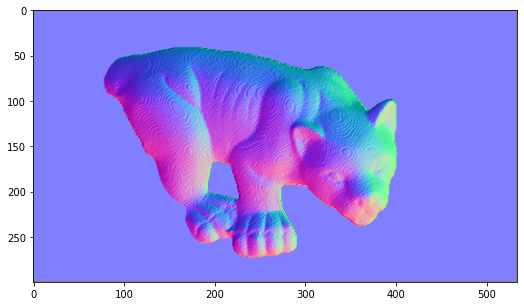

In [12]:
plt.figure(figsize=(15, 5))
plt.imshow(normalize(puma_normals))

## Saving  normals

In [13]:
from numpy import savez_compressed

In [14]:
savez_compressed('tmp', puma_normals)

In [15]:
from numpy import load

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


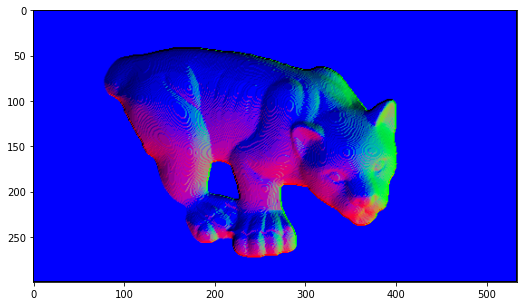

In [16]:
plt.figure(figsize=(15, 5))
plt.imshow(np.array(load('tmp.npz')['arr_0']))

## Open saved normals

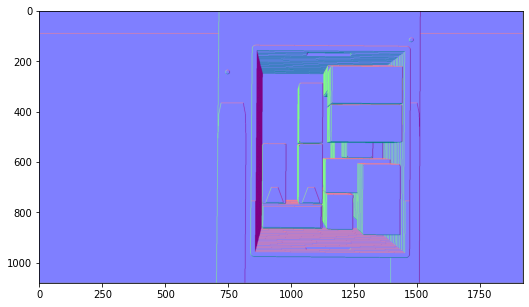

In [18]:
plt.figure(figsize=(15, 5))
img = load('../normals/Top_NoMagic_00000001.npz')['arr_0']
plt.imshow(normalize(img))

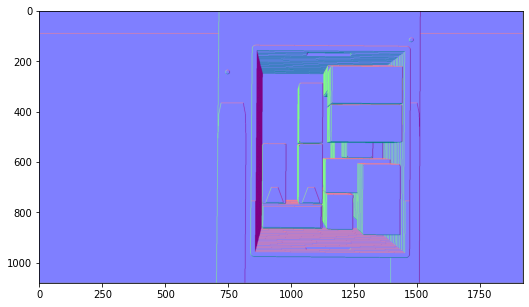

In [19]:
plt.figure(figsize=(15, 5))
img = load('../normals/Top_NoMagic_00000001.npz')['arr_0']
plt.imshow(normalize(img))

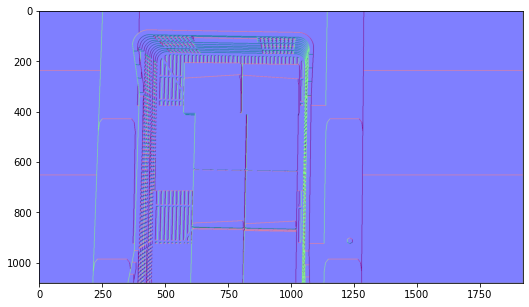

In [20]:
plt.figure(figsize=(15, 5))
img = load('../normals/Top_NoMagic_00000010.npz')['arr_0']
plt.imshow(normalize(img))